# Predict Migration
This is a real-world task of Machine Learning task to predict the migration of humans between countries.

[Source link](https://thecleverprogrammer.com/2020/09/08/predict-migration-with-machine-learning/)

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
data = pd.read_csv("data/migration_nz.csv")
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [4]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
dtype: int64

### Filling missing values with median

In [5]:
data["Value"].fillna(data["Value"].median(), inplace=True)
data.isnull().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
dtype: int64

## Exploring the dataset

### 1. Measure

Measure
Arrivals      28842
Departures    28842
Net           28842
Name: count, dtype: int64


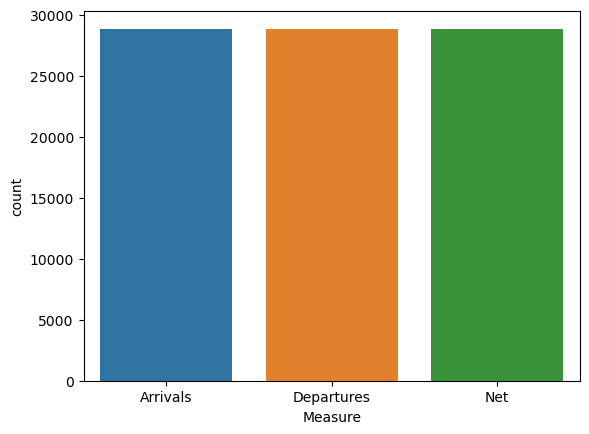

In [6]:
print(data["Measure"].value_counts())
sns.countplot(data, x="Measure");

We have 3 different measures, each of them has 28842 value!

### 2. Country

In [7]:
print(f'Number of unique values in Country column: {data["Country"].nunique()}')
data["Country"].value_counts()

Number of unique values in Country column: 253


Country
Oceania              342
US Virgin Islands    342
Puerto Rico          342
Paraguay             342
Suriname             342
                    ... 
Greece               342
Croatia              342
Hungary              342
Ireland              342
All countries        342
Name: count, Length: 253, dtype: int64

We have 253 countries, each country has 342 value!

### 3. Citizenship

Citizenship
New Zealand Citizen       28842
Australian Citizen        28842
Total All Citizenships    28842
Name: count, dtype: int64


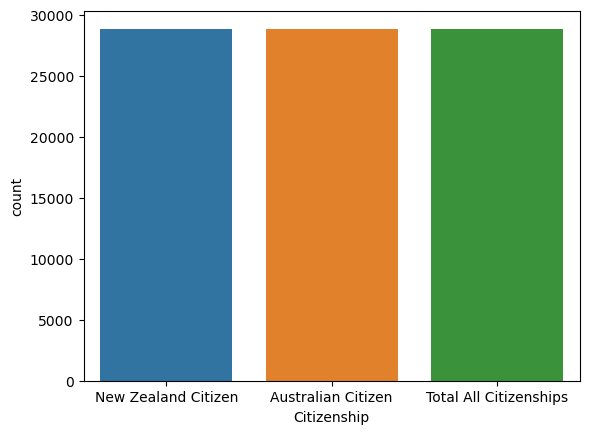

In [8]:
print(data["Citizenship"].value_counts())
sns.countplot(data, x="Citizenship");

### 4. Value

(0.0, 1010239.2)

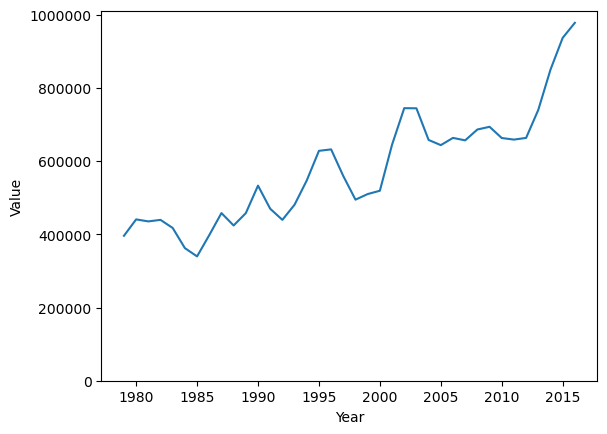

In [9]:
grouped = data.groupby("Year")["Value"].sum()
sns.lineplot(grouped)
plt.ticklabel_format(axis="y", style="plain")
plt.ylim(bottom=0)

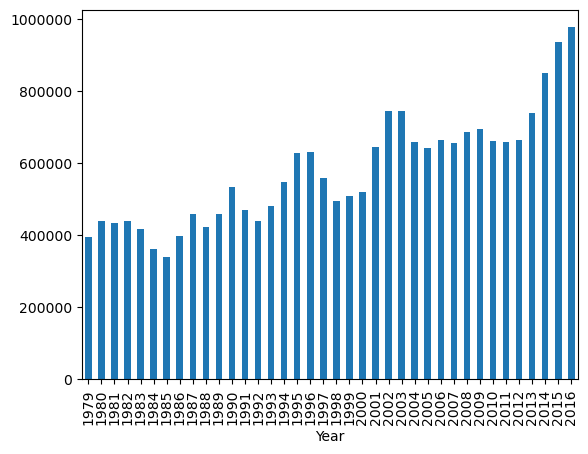

In [10]:
grouped.plot(kind="bar")
plt.ticklabel_format(axis="y", style="plain")

## Converting string features to numerical

In [11]:
data["MeasureID"] = pd.factorize(data["Measure"])[0]
data["CountryID"] = pd.factorize(data["Country"])[0]
data["CityID"] = pd.factorize(data["Citizenship"])[0]

In [12]:
data["MeasureID"].unique()

array([0, 1, 2])

In [13]:
data["CityID"].unique()

array([0, 1, 2])

In [14]:
data["CountryID"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Maxrix of features and labels

In [15]:
X = data[["CountryID", "MeasureID", "CityID", "Year"]].values
y = data["Value"].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (86526, 4)
y (86526,)


## Splitting the dataset to train set and test set

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (60568, 4)
X_test  (25958, 4)
y_train (60568,)
y_test  (25958,)


## Training the Regression Model

In [17]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=70, max_features=5)
reg_rf.fit(X_train, y_train)
reg_rf.score(X_test, y_test)

0.9361327016815447

## Predicting the test set

In [18]:
y_pred = reg_rf.predict(X_test)
pd.options.display.precision = 2
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,0.0,1.74
1,0.0,0.01
2,0.0,4.14
3,173.0,76.57
4,0.0,0.27
5,0.0,-0.16
6,0.0,0.14
7,0.0,0.20
8,0.0,1.07
9,0.0,0.19


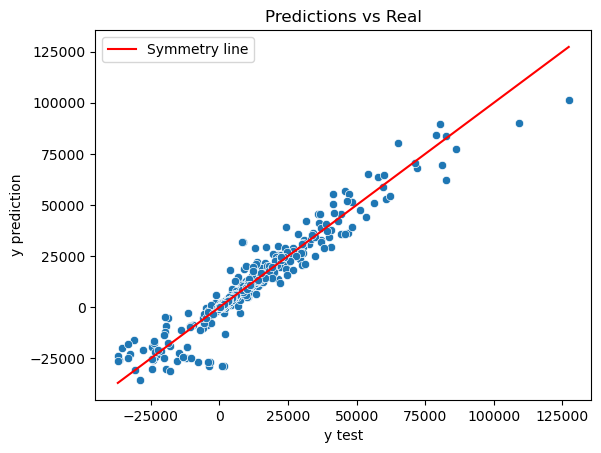

In [19]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real")
plt.legend()
plt.plot();

## Plotting the residuals

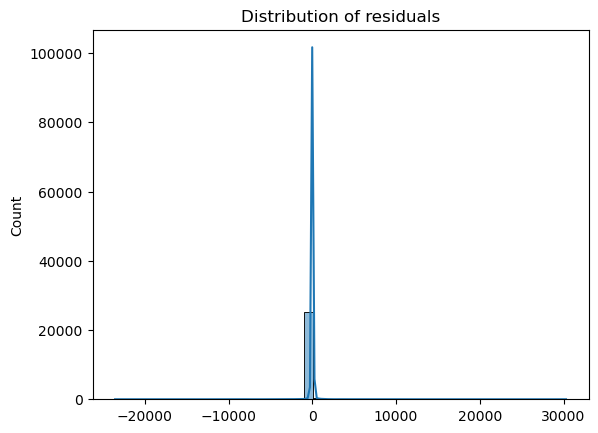

In [20]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Evaluating the model

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")
print(f"The mse of the model: {mse:.3f}")

The R2 score of the model: 0.936
The mse of the model: 624195.484
